In [93]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [94]:
dir_results = "/pool001/vianajr/cluster_ages_1/results/single_case/"

In [95]:
# If flag remove extremes:
remextremes = "no"

In [96]:
# Path:
folders =[f"single_case_5im_remextremes_{remextremes}_augment_no_blackout_no_normby_five-images/",
          f"single_case_5im_remextremes_{remextremes}_augment_no_blackout_outer_normby_five-images/R_6/",
          f"single_case_5im_remextremes_{remextremes}_augment_no_blackout_inner_normby_five-images/R_6/",
          f"single_case_1im_remextremes_{remextremes}_augment_no_blackout_no_normby_single-image/",
          f"single_case_1im_remextremes_{remextremes}_augment_no_blackout_outerR12_normby_single-image/R_12/",
          f"single_case_1im_remextremes_{remextremes}_augment_no_blackout_outer_normby_single-image/R_6/",
          f"single_case_1im_remextremes_{remextremes}_augment_no_blackout_inner_normby_single-image/R_6/",
          f"single_case_1im_remextremes_{remextremes}_augment_no_blackout_innerR12_normby_single-image/R_12/",
         ]

In [97]:

# Initialize the metrics:
plotting_arr_mean_ts_MdAE_dnrm = []
plotting_arr_stdv_ts_MdAE_dnrm = []

plotting_arr_mean_ts_inner_MdAE_dnrm = []
plotting_arr_stdv_ts_inner_MdAE_dnrm = []

plotting_arr_mean_ts_outer_MdAE_dnrm = []
plotting_arr_stdv_ts_outer_MdAE_dnrm = []

# Loop through the folders:
for folder_i in folders:

    # Ge the directory:
    dir_file_i = dir_results + folder_i + "all_models_final_metrics.pkl"
    
    # Open and load the pickle file
    with open(dir_file_i, 'rb') as file:
        data = pickle.load(file)

    # Display the content of the .pkl file
    #print(data.keys())

    # Append the mean value:
    plotting_arr_mean_ts_MdAE_dnrm.append( np.mean(data["all_ts_final_MdAEs_dnrm"]) )
    plotting_arr_stdv_ts_MdAE_dnrm.append( np.std(data["all_ts_final_MdAEs_dnrm"]) )
    
    plotting_arr_mean_ts_inner_MdAE_dnrm.append( np.mean(data["all_ts_subset_inner_MdAEs_dnrm"]) )
    plotting_arr_stdv_ts_inner_MdAE_dnrm.append( np.std(data["all_ts_subset_inner_MdAEs_dnrm"]) )

    plotting_arr_mean_ts_outer_MdAE_dnrm.append( np.mean(data["all_ts_subset_outer_MdAEs_dnrm"]) )
    plotting_arr_stdv_ts_outer_MdAE_dnrm.append( np.std(data["all_ts_subset_outer_MdAEs_dnrm"]) )


In [98]:
# Append the guess:

# If we train with extremes - guess = 7.315204 - mean of the tr_Y (we have a lot of young stars, show the hist maybe).
if remextremes == "no": 
    plotting_arr_mean_ts_MdAE_dnrm.append( 1.2200055646896362 ) # From all the test set
    plotting_arr_mean_ts_outer_MdAE_dnrm.append( 1.0626738214492797 ) # From test set only outer points
    plotting_arr_mean_ts_inner_MdAE_dnrm.append( 1.316856360435486 ) # From test set only inner points
    
# If we train without extremes - guess = 8.099079 - mean of the tr_Y:
else: 
    plotting_arr_mean_ts_MdAE_dnrm.append( 0.6137616157531738 ) # From all the test set
    plotting_arr_mean_ts_outer_MdAE_dnrm.append( 2.416897554397583 ) # Not from test set (becaused no extremes), but not used for tr
    plotting_arr_mean_ts_inner_MdAE_dnrm.append( 0.6137616157531738 ) # From test set points.
    
# No stdv:
plotting_arr_stdv_ts_MdAE_dnrm.append( 0 )
plotting_arr_stdv_ts_outer_MdAE_dnrm.append( 0 )
plotting_arr_stdv_ts_inner_MdAE_dnrm.append( 0 )


In [99]:
plotting_arr_mean_ts_MdAE_dnrm

[0.45354451227188103,
 0.33684873867034915,
 0.7850365314483643,
 0.7944212169647217,
 0.7398854856491088,
 0.7841779074668884,
 0.9053332681655883,
 0.9802435746192932,
 1.2200055646896362]

In [100]:
colors_grey = [
    "#cccccc",  # light grey (new)
    "#b3b3b3",  # medium-light grey
    "#999999",  # medium grey
    "#808080",  # medium-dark grey
    "#666666",  # dark grey
    "#4d4d4d",  # darker grey
    "#333333",  # very dark grey
    "#1f1f1f",  # near black (new)
    "#0d0d0d"   # almost black
]

colors_blue = [
    "#cce6ff",  # very light blue (new)
    "#b3d9ff",  # light blue
    "#99ccff",  # soft sky blue
    "#66b3ff",  # mid-bright blue
    "#3399ff",  # strong blue
    "#1a80e5",  # deep vibrant blue
    "#005bb5",  # dark blue
    "#003d99",  # very dark blue (new)
    "#002060"   # Microsoft dark blue
]


if remextremes == "no": 
    colors = colors_grey
    title = "Full Sample"
else:  
    colors = colors_blue
    title = "Without Extreme Ages"


def plot_error_bar_chart(plotting_arr_mean, plotting_arr_stdv):
    
    # Setting the font style to Times New Roman and adjusting font sizes for journal style
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 16  # Bigger font size for readability

    # Names for each category:
    names = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

    # Creating the horizontal bar plot with thicker error bars
    plt.figure(figsize=(4, 9))
    bars = plt.barh(names, plotting_arr_mean, xerr=plotting_arr_stdv, capsize=10, 
                    color=colors, edgecolor='black', height=0.5, error_kw=dict(elinewidth=3, ecolor='black'))
    
    # Adding titles and labels with larger font size
    plt.title(title, fontsize=16)
    plt.xlabel('dex', fontsize=16)

    if remextremes == "no":
        # Set xticks at every 0.05 and label only at every 0.1
        tick_positions = [0.1 * i for i in range(13)]
        label_positions = [0.2 * i for i in range(13)]
        x_lim_top = 1.3
    else: 
        # Set xticks at every 0.05 and label only at every 0.1
        tick_positions = [0.05 * i for i in range(15)]
        label_positions = [0.1 * i for i in range(15)]
        x_lim_top = 0.65
    
    plt.xticks(ticks=tick_positions, labels=[f'{x:.1f}' if x in label_positions else '' for x in tick_positions], fontsize=14)

    # Customize the tick size based on whether it has a label or not
    ax = plt.gca()  # Get the current axis
    for tick in ax.xaxis.get_major_ticks():
        if tick.label1.get_text():  # If there's a label
            tick.tick1line.set_markersize(6)  # Set larger tick size
            tick.tick1line.set_linewidth(1.5)  # Thicker tick
        else:  # If no label, smaller tick
            tick.tick1line.set_markersize(3)  # Smaller tick
            tick.tick1line.set_linewidth(1)   # Thinner tick

    # Adding vertical lines from the end of each bar to the x-axis
    for i, bar in enumerate(bars):
        plt.vlines(x=plotting_arr_mean[i], ymin=-1, ymax=i, color='black', linestyle='--', linewidth=1.5)  # Vertical line

    # Styling
    plt.xlim([0.0, x_lim_top])
    plt.ylim([-0.4, 8.4])
    plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.6)
    plt.tight_layout()

    # Saving and displaying the plot
    plt.savefig(f"plots_storage/barplot_comp_remextremes_{remextremes}.svg")
    plt.show()


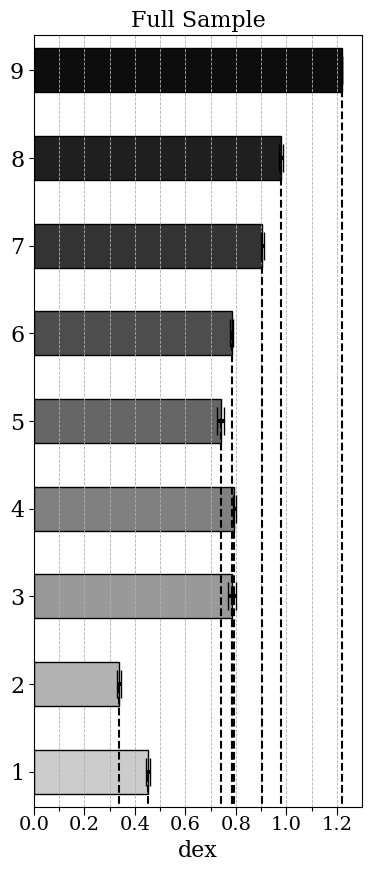

In [101]:
plot_error_bar_chart(plotting_arr_mean_ts_MdAE_dnrm, plotting_arr_stdv_ts_MdAE_dnrm)